In [1]:
# Import the necessary Libraries.

import pandas as pd
import seaborn as sns
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(display='diagram')

In [5]:
# Load the dataset

train = pd.read_csv('titanic_dataset/train.csv')
test = pd.read_csv('titanic_dataset/test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Explore the contents of our dataset. 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [9]:
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.25,random_state=1)

In [10]:
categorical_cols = X_train.select_dtypes('object').columns.to_list()
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [11]:
numerical_cols = X_train.select_dtypes(exclude='object').columns.to_list()
numerical_cols

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
# Create Seperate Preprocessors for Numerical and Categorical Columns 


# creating pipeline for numeric data preprocessing
numeric_preprocessor = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaling',StandardScaler()),
])

In [13]:
# creating pipeline for categorical data preprocessing

categorical_preprocessor = Pipeline(steps=[
     ('imputer',SimpleImputer(strategy='constant')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# Use ColumnTransformer to transform categorical and numeric columns. 



preprocessor = ColumnTransformer([
    ('categorical',categorical_preprocessor,categorical_cols),
    ('numeric',numeric_preprocessor,numerical_cols),

])

In [20]:
# adding our preprocessor and model in pipelines.
Pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(C=1e9)),
])

In [21]:
Pipe.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Name', 'Sex', 'Ticket',
                                                   'Cabin', 'Embarked']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Age', 'SibSp', 'Parch',
                                                   'Fare'])])),
                ('model', LogisticRegression(C=1000000000.0))])

In [22]:
preds = Pipe.predict(X_val)
preds_train = Pipe.predict(X_train)
print('Accuracy on training data :',accuracy_score(preds_train,y_train))
print('Accuracy on validation data :',accuracy_score(preds,y_val))

Accuracy on training data : 1.0
Accuracy on validation data : 0.8251121076233184


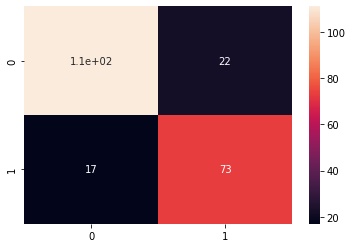

In [24]:
sns.heatmap(confusion_matrix(preds,y_val),annot=True);


In [26]:
# Prediction 

predict_result = Pipe.predict(df_test)

result = pd.DataFrame({'PassengerId': df_test.PassengerId,
                       'Survived': predict_result})

In [27]:
result.sample(5)

,PassengerId,Survived
387,1279,0
132,1024,0
272,1164,1
248,1140,1
407,1299,0
